In [1]:
from models.TorchClassifier import TorchClassifier
from Embeddings import Embeddings
import time
import utils
from sklearn.model_selection import train_test_split
import torch
from models.FFNN import FFNN

In [2]:
# Create the embeddings object
embeddings = Embeddings('../data/doc2vec.npy', '../data/bert.npy', '../data/authors.npy', '../data/authors_encoded.npy', '../pickles/author_encoder.pkl')

In [3]:
# Load the feature matrix and labels
X = embeddings.get_doc2vec(as_torch=True)
y = embeddings.get_labels(as_torch=True)

# Scale the feature matrix
X = torch.from_numpy(utils.scale_feature_matrix(X)).float()

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create the classifier
ffnn = TorchClassifier(FFNN, input_dim=768, hidden_dim=256, output_dim=20)

In [6]:
# Train the classifier
start = time.time()
ffnn.train(X_train, y_train, epochs=100, batch_size=32)
end = time.time()
print(f'Training time: {end - start} seconds')

/Users/dpogrebitskiy/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Epoch 1/100, Loss: 0.23224042356014252
Epoch 2/100, Loss: 0.19642797112464905
Epoch 3/100, Loss: 0.06587415188550949
Epoch 4/100, Loss: 1.2295918464660645
Epoch 5/100, Loss: 1.37555992603302
Epoch 6/100, Loss: 0.010068988427519798
Epoch 7/100, Loss: 0.009012661874294281
Epoch 8/100, Loss: 0.000637365214060992
Epoch 9/100, Loss: 0.13198891282081604
Epoch 10/100, Loss: 0.011873400770127773
Epoch 11/100, Loss: 0.0040793283842504025
Epoch 12/100, Loss: 0.1029854342341423
Epoch 13/100, Loss: 0.03234300762414932
Epoch 14/100, Loss: 0.09700407087802887
Epoch 15/100, Loss: 0.037309300154447556
Epoch 16/100, Loss: 0.007665989920496941
Epoch 17/100, Loss: 5.9604641222676946e-08
Epoch 18/100, Loss: 0.07900208234786987
Epoch 19/100, Loss: 0.24396996200084686
Epoch 20/100, Loss: 0.2518114447593689
Epoch 21/100, Loss: 0.003713370533660054
Epoch 22/100, Loss: 2.3841852225814364e-07
Epoch 23/100, Loss: 0.004757452756166458
Epoch 24/100, Loss: 0.0007762840250506997
Epoch 25/100, Loss: 7.092905889294343

In [7]:
# Evaluate the classifier
ffnn.evaluate(X_test, y_test)

{'Precision': 0.6484930713502419,
 'Recall': 0.647911632723507,
 'F1': 0.6469399429186575,
 'Accuracy': 0.647911632723507}

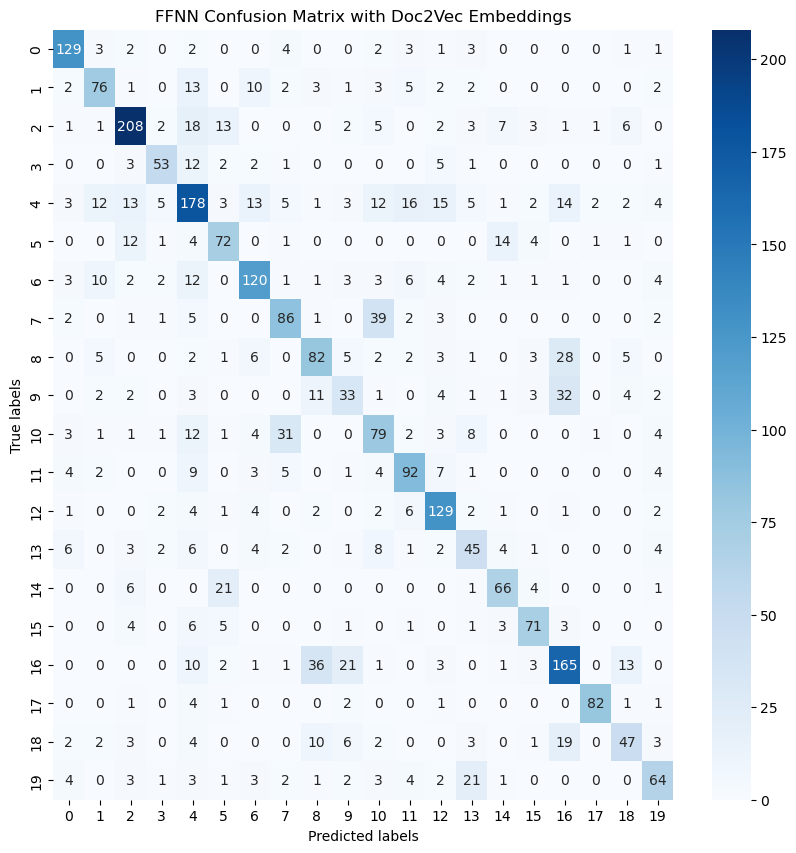

In [8]:
# Create a confusion matrix
ffnn.confusion_matrix(X_test, y_test, 'FFNN Confusion Matrix with Doc2Vec Embeddings')

In [9]:
# Load the BERT embeddings
X = embeddings.get_bert(as_torch=True).float()
y = embeddings.get_labels(as_torch=True)

# No need to scale BERT embeddings

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create the classifier
ffnn = TorchClassifier(FFNN, input_size=768, hidden_size=256, num_classes=20)

In [12]:
# Train the classifier
start = time.time()
ffnn.train(X_train, y_train, epochs=100, batch_size=32)
end = time.time()
print(f'Training time: {end - start} seconds')

Epoch 1/100, Loss: 0.7472224235534668
Epoch 2/100, Loss: 0.5910848379135132
Epoch 3/100, Loss: 0.13659264147281647
Epoch 4/100, Loss: 0.4528975784778595
Epoch 5/100, Loss: 0.046412575989961624
Epoch 6/100, Loss: 0.03514029085636139
Epoch 7/100, Loss: 0.038930248469114304
Epoch 8/100, Loss: 0.9903038740158081
Epoch 9/100, Loss: 0.5810397863388062
Epoch 10/100, Loss: 0.5597541332244873
Epoch 11/100, Loss: 0.08394237607717514
Epoch 12/100, Loss: 0.1673072874546051
Epoch 13/100, Loss: 0.21228890120983124
Epoch 14/100, Loss: 0.0032024732790887356
Epoch 15/100, Loss: 0.5083402395248413
Epoch 16/100, Loss: 2.0265540570107987e-06
Epoch 17/100, Loss: 0.009369165636599064
Epoch 18/100, Loss: 0.2503414452075958
Epoch 19/100, Loss: 8.582677401136607e-05
Epoch 20/100, Loss: 0.05755515396595001
Epoch 21/100, Loss: 0.10261683911085129
Epoch 22/100, Loss: 0.000912309973500669
Epoch 23/100, Loss: 0.00020148690964560956
Epoch 24/100, Loss: 0.035399749875068665
Epoch 25/100, Loss: 3.725151691469364e-05
E

In [13]:
# Evaluate the classifier
ffnn.evaluate(X_test, y_test)

{'Precision': 0.8147732684290961,
 'Recall': 0.8115291681049361,
 'F1': 0.8124677391887735,
 'Accuracy': 0.8115291681049361}

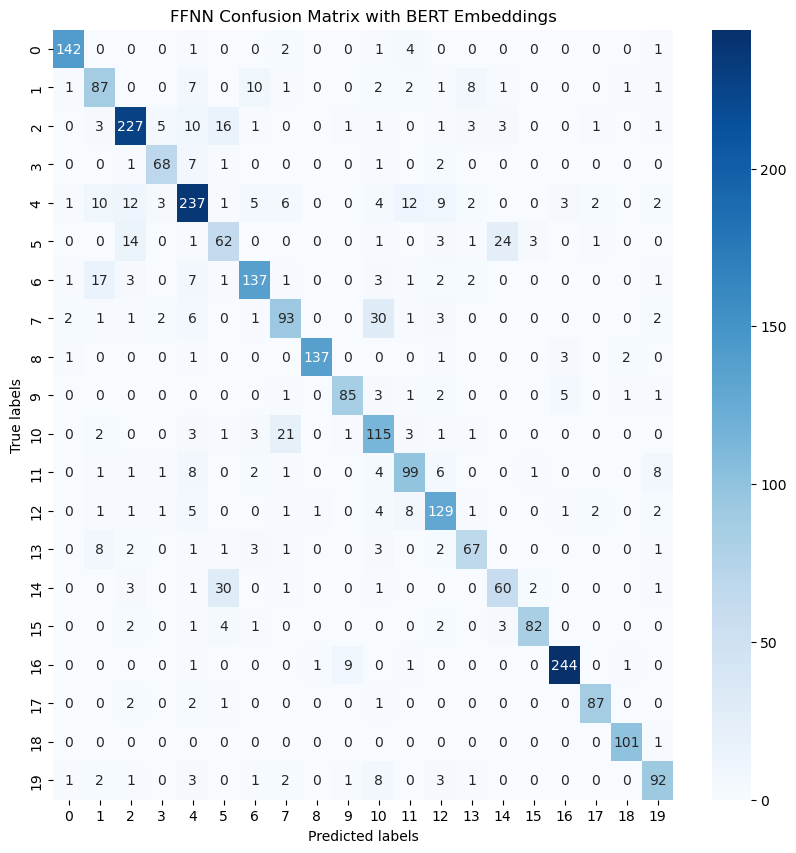

In [14]:
# Create a confusion matrix
ffnn.confusion_matrix(X_test, y_test, 'FFNN Confusion Matrix with BERT Embeddings')